# Projeto de Bloco: Inteligência Artificial e Machine Learning
## Teste de Performance - TP4

### Atividade 1
Clusterização K-Médias: Utilizaremos o algoritmo K-Médias para agrupar os dados do conjunto de treinamento. O número ótimo de clusters será determinado com base em métricas como o método do cotovelo e o índice de silhueta.

### Atividade 2
Criação de Features: Para cada instância nos conjuntos de treinamento e teste, será gerada uma nova feature indicando a distância da instância ao centro do cluster mais próximo. Este processo visa incorporar a estrutura de agrupamento dos dados como uma informação adicional para o modelo de aprendizado supervisionado.

### Atividade 3
Modelo de ML: Serão treinados utilizando tanto o conjunto de features original quanto o conjunto de features expandido com as distâncias dos clusters. Use:
- Modelos SVM com diferentes configurações de kernel (linear, polinomial, RBF) e parâmetros de regularização para otimizar o desempenho.
- Modelos Random Forest com diferentes parâmetros para otimizar o desempenho. 

### Atividade 4
Avaliação de Modelos: O desempenho dos modelos será avaliado com base em métricas de classificação padrão, como precisão, recall, F1-score e AUC-ROC, utilizando os conjuntos de teste.

### Atividade 5
Análise Comparativa: Será realizada uma análise comparativa para avaliar o impacto da adição das features de clusterização no desempenho dos modelos de ML. Além disso, será discutida a influência do número de clusters e das configurações do ML nas métricas de desempenho. Use gráficos para ilustrar seus argumentos.


Calculando inércias e scores de silhueta para diferentes valores de k:
   k = 3
   k = 4
   k = 5
   k = 6
   k = 7
   k = 8
   k = 9
   k = 10
   k = 11
   k = 12
   k = 13
   k = 14
   k = 15
   k = 16
   k = 17
   k = 18
   k = 19
   k = 20


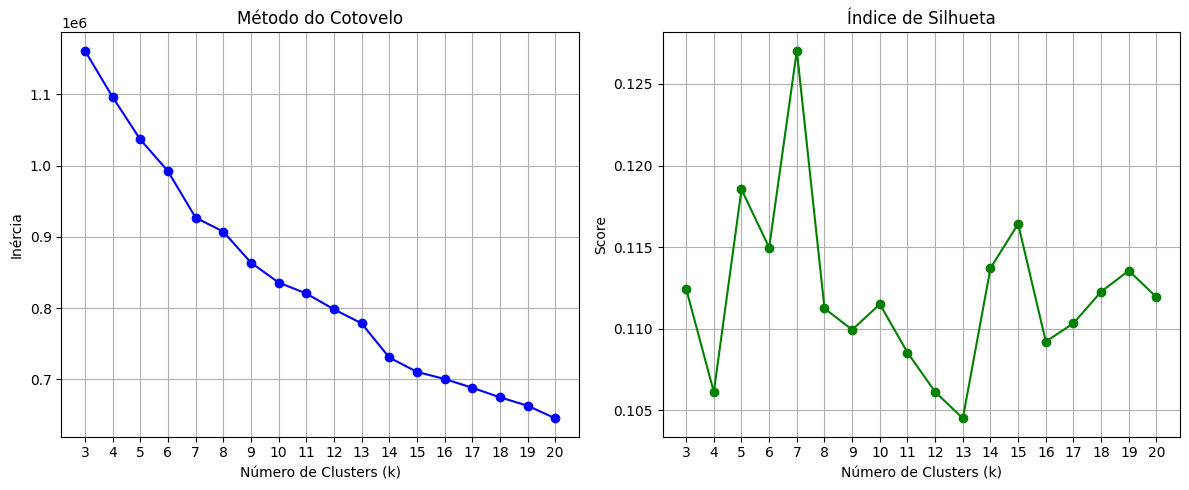

Melhor k baseado no Índice de Silhueta: 7

Criando modelos SVM com diferentes kernels:
   kernel = linear (features originais)
   kernel = linear (features expandida com K-Means)
   kernel = poly (features originais)
   kernel = poly (features expandida com K-Means)
   kernel = rbf (features originais)
   kernel = rbf (features expandida com K-Means)

Criando modelo RandomForest:
   features originais
   features expandida com K-Means

Resultados das métricas para SVM e RandomForest:
         Kernel  Precisão (original)  Recall (original)  F1 (original)  \
0        linear             0.325469           0.368640       0.345071   
1          poly             0.363358           0.412237       0.385309   
2           rbf             0.458624           0.445614       0.416455   
3  RandomForest             0.673476           0.658114       0.659715   

   AUC (original)  Precisão (K-Means)  Recall (K-Means)  F1 (K-Means)  \
0        0.592114            0.326101          0.369561      0.3460

In [1]:
import pandas as pd
import numpy as np
import kagglehub
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Importar o dataset Spotify Tracks Dataset
path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")
spotify = pd.read_csv(path + "/dataset.csv")

# Selecionando as features para usar no TP
# As seguintes features numéricas serão usadas
numeric_col = ["duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"]
target_col = "popularity"

# Selecionando somente as features a serem usadas
features_orig = spotify[numeric_col]

# Normalizando as features
scaler = StandardScaler()
features_orig_scaled = scaler.fit_transform(features_orig)

# Definindo uma semente para reprodutibilidade
RANDOM_STATE = 11

# --------------------------------------------------------------------------------
# Atividade 1
# --------------------------------------------------------------------------------

# Usando K-Means para encontrar o número ideal de clusters
inertias = []
silhouette_scores = []
cluster_range = range(3, 21)
print("Calculando inércias e scores de silhueta para diferentes valores de k:")
for k in cluster_range:
    print(f"   k = {k}")
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    labels = kmeans.fit_predict(features_orig_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_orig_scaled, labels))

# Gerar gráfico do Método do Cotovelo
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertias, 'o-', color='blue')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.xticks(cluster_range)
plt.grid(True)

# Gerar gráfico do Índice de Silhueta
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, 'o-', color='green')
plt.title("Índice de Silhueta")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Score")
plt.xticks(cluster_range)
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------------
# Atividade 2
# --------------------------------------------------------------------------------

# Melhor k baseado no Índice de Silhueta
best_k = cluster_range[np.argmax(silhouette_scores)]
print(f"Melhor k baseado no Índice de Silhueta: {best_k}")

# Criar o modelo K-Means e gerar a nova feature baseado no melhor valor de k
kmeans = KMeans(n_clusters=best_k, random_state=RANDOM_STATE)
new_feature = kmeans.fit_predict(features_orig_scaled)

# Criando dataframe, adicionando a nova feature
features_kmeans_scaled = pd.DataFrame(features_orig_scaled, columns=features_orig.columns, index=features_orig.index if isinstance(features_orig, pd.DataFrame) else None)
features_kmeans_scaled["feature_kmeans"] = new_feature

# Definindo o target baseado no limiar de popularidade
bins = [0, 20, 40, 60, 80, 100]
labels = ["0-20", "20-40", "40-60", "60-80", "80-100"]
target = pd.cut(spotify["popularity"], bins=bins, labels=labels, include_lowest=True)

# --------------------------------------------------------------------------------
# Atividade 3(a)
# --------------------------------------------------------------------------------

# Dividindo os dados em conjuntos de treino e teste
feature_train_orig, feature_test_orig, target_train_orig, target_test_orig = train_test_split(features_orig_scaled, target, test_size=0.20, random_state=RANDOM_STATE)
feature_train_kmeans, feature_test_kmeans, target_train_kmeans, target_test_kmeans = train_test_split(features_kmeans_scaled, target, test_size=0.20, random_state=RANDOM_STATE)

# Criando os modelos SVM com diferentes kernels
kernels = ["linear", "poly", "rbf"]
metrics_results = []
print("\nCriando modelos SVM com diferentes kernels:")
for kernel in kernels:
    # SVM com features originais
    print(f"   kernel = {kernel} (features originais)")
    svm_orig = SVC(kernel=kernel, C=1.0, probability=True)
    svm_orig.fit(feature_train_orig, target_train_orig)
    target_pred_class_orig = svm_orig.predict(feature_test_orig)
    target_pred_proba_orig = svm_orig.predict_proba(feature_test_orig)
    target_true_class_orig = target_test_orig

    # SVM com features expandida com K-Means
    print(f"   kernel = {kernel} (features expandida com K-Means)")
    svm_kmeans = SVC(kernel=kernel, C=1.0, probability=True)
    svm_kmeans.fit(feature_train_kmeans, target_train_kmeans)
    target_pred_class_kmeans = svm_kmeans.predict(feature_test_kmeans)
    target_pred_proba_kmeans = svm_kmeans.predict_proba(feature_test_kmeans)
    target_true_class_kmeans = target_test_kmeans

    # --------------------------------------------------------------------------------
    # Atividade 4(a)
    # --------------------------------------------------------------------------------

    # Calculando as métricas com as features originais
    precision_orig = precision_score(target_true_class_orig, target_pred_class_orig, average="weighted")
    recall_orig    = recall_score(target_true_class_orig, target_pred_class_orig, average="weighted")
    f1_orig        = f1_score(target_true_class_orig, target_pred_class_orig, average="weighted")
    auc_orig = roc_auc_score(pd.get_dummies(target_true_class_orig), target_pred_proba_orig, multi_class="ovr")

    # Calculando as métricas com as features do K-Means
    precision_kmeans = precision_score(target_true_class_kmeans, target_pred_class_kmeans, average="weighted")
    recall_kmeans    = recall_score(target_true_class_kmeans, target_pred_class_kmeans, average="weighted")
    f1_kmeans        = f1_score(target_true_class_kmeans, target_pred_class_kmeans, average="weighted")
    auc_kmeans       = roc_auc_score(pd.get_dummies(target_true_class_kmeans), target_pred_proba_kmeans, multi_class="ovr")

    # Gerando os resultados
    metrics_results.append({
        "Kernel": kernel,
        "Precisão (original)": precision_orig,
        "Recall (original)": recall_orig,
        "F1 (original)": f1_orig,
        "AUC (original)": auc_orig,
        "Precisão (K-Means)": precision_kmeans,
        "Recall (K-Means)": recall_kmeans,
        "F1 (K-Means)": f1_kmeans,
        "AUC (K-Means)": auc_kmeans
    })

# --------------------------------------------------------------------------------
# Atividade 3(b)
# --------------------------------------------------------------------------------

# Criando o modelo com RandomForest e as features originais
print("\nCriando modelo RandomForest:")
print("   features originais")
rf_orig = RandomForestClassifier(n_estimators=300, random_state=RANDOM_STATE, n_jobs=-1)
rf_orig.fit(feature_train_orig, target_train_orig)
target_pred_class_orig_rf = rf_orig.predict(feature_test_orig)
target_pred_proba_orig_rf = rf_orig.predict_proba(feature_test_orig)
target_true_class_orig = target_test_orig

# Criando o modelo com RandomForest e as features expandida com K-Means
print("   features expandida com K-Means")
rf_kmeans = RandomForestClassifier(n_estimators=300, random_state=RANDOM_STATE, n_jobs=-1)
rf_kmeans.fit(feature_train_kmeans, target_train_kmeans)
target_pred_class_kmeans_rf = rf_kmeans.predict(feature_test_kmeans)
target_pred_proba_kmeans_rf = rf_kmeans.predict_proba(feature_test_kmeans)
target_true_class_kmeans = target_test_kmeans

# --------------------------------------------------------------------------------
# Atividade 4(b)
# --------------------------------------------------------------------------------

# Calculando as métricas com as features originais
precision_orig_rf = precision_score(target_true_class_orig, target_pred_class_orig_rf, average="weighted")
recall_orig_rf    = recall_score(target_true_class_orig, target_pred_class_orig_rf, average="weighted")
f1_orig_rf        = f1_score(target_true_class_orig, target_pred_class_orig_rf, average="weighted")
auc_orig_rf       = roc_auc_score(pd.get_dummies(target_true_class_orig), target_pred_proba_orig_rf, multi_class="ovr")

# Calculando as métricas com as features do K-Means
precision_kmeans_rf = precision_score(target_true_class_kmeans, target_pred_class_kmeans_rf, average="weighted")
recall_kmeans_rf    = recall_score(target_true_class_kmeans, target_pred_class_kmeans_rf, average="weighted")
f1_kmeans_rf        = f1_score(target_true_class_kmeans, target_pred_class_kmeans_rf, average="weighted")
auc_kmeans_rf       = roc_auc_score(pd.get_dummies(target_true_class_kmeans), target_pred_proba_kmeans_rf, multi_class="ovr")

# Gerando os resultados
metrics_results.append({
    "Kernel": "RandomForest",
    "Precisão (original)": precision_orig_rf,
    "Recall (original)":   recall_orig_rf,
    "F1 (original)":       f1_orig_rf,
    "AUC (original)":      auc_orig_rf,
    "Precisão (K-Means)":   precision_kmeans_rf,
    "Recall (K-Means)":     recall_kmeans_rf,
    "F1 (K-Means)":         f1_kmeans_rf,
    "AUC (K-Means)":        auc_kmeans_rf
})

# Criar um dataframe com os resultados
metrics_df = pd.DataFrame(metrics_results)

# Exibir os resultados
print("\nResultados das métricas para SVM e RandomForest:")
print(metrics_df)